## 0. Goal
Run UMAP on the trained VAE latent features <br>
Vary the duration of the sliding window. 

In [25]:
import os, sys, importlib, librosa, glob, h5py, tqdm, pickle, gc
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import Parallel, delayed
import random
import umap, hdbscan
from collections import Counter
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
import torch
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

plt.rcParams['pdf.fonttype'] = 42 

In [5]:
# import my utility script
cluster_script_path = '/home/zz367/ProjectsU/EphysMONAO/Jupyter/MatlabCodes/ZZ_callClustering/'
sys.path.insert(1, cluster_script_path)
import vae_goffinet, hopkins
importlib.reload(vae_goffinet)

<module 'vae_goffinet' from '/home/zz367/ProjectsU/EphysMONAO/Jupyter/MatlabCodes/ZZ_callClustering/vae_goffinet.py'>

In [6]:
# create a custom colormap for spectrogram
jet = plt.get_cmap('jet', 255)
# Extract jet colors and prepend black at the beginning
jet_colors = jet(np.linspace(0, 1, 255))
custom_colors = np.vstack([[0, 0, 0, 1], jet_colors])  # Black for 0, then jet
custom_cmap = ListedColormap(custom_colors)

## 1. Inputs

In [7]:
fd_z4 = '/mnt/z4'
fd_data = os.path.join(fd_z4, 'zz367', 'EphysMONAO', 'Analyzed', 'vaeWav')
birdIDs = ['pair5RigCCU29', 'pair4RigACU68', 'pair4RigBCU53', 'pair2RigBCU25']
# color limits when calculating spectrograms, depending on the audio amplitude, may differ between birds
clims = [[1.5,7], [1.5,7], [1.5,8.5], [1.5,8]]
# what syllable to analyze, empty means all syllable with annotation
syl = ['v', 'b', 'h', 'e', 'x']
# what spectroram dataset to use, see ZZp1_makeSpec_traj_v1.ipynb
spec_suffix = 'Spectrogram2'
spec_run = 'spec_goffinet_traj_256_236'
# what chopped dataset to use
chop_suffix = 'Chop5'
# chop_run = 'traj_chop_32_1_32'
# chop_runs = [
# what VAE run to use
vae_suffix = 'VAE5'
# vae_run = chop_run
# shape of the spectrogram window
X_SHAPE = (128, 128)

In [9]:
# parameters for UMAP
param_umap = {'n_components':2, 'n_neighbors':25, 'min_dist':0, 'metric':'euclidean'}
# where to save UMAP results
umap_suffix = 'UMAP5'
umap_run = f'{param_umap["n_components"]}_{param_umap["n_neighbors"]}_{param_umap["min_dist"]}_{param_umap["metric"]}'
print(umap_run)

2_25_0_euclidean


## 2. Run UMAP on all or selected syllable categories

In [10]:
bi = 0
bd = birdIDs[bi]

In [11]:
# loop through different sliding window width
win_list =  [16,   24,  32,  40,  48,  64, 80]

/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair5RigCCU29/Traj/UMAP5/24_1_24
(230589, 32)
(230589, 16)
(230589, 16) (230589, 32)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Wed Jul 30 17:10:20 2025 Construct fuzzy simplicial set
Wed Jul 30 17:10:20 2025 Finding Nearest Neighbors
Wed Jul 30 17:10:20 2025 Building RP forest with 29 trees


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Wed Jul 30 17:10:22 2025 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	Stopping threshold met -- exiting after 3 iterations
Wed Jul 30 17:10:36 2025 Finished Nearest Neighbor Search
Wed Jul 30 17:10:38 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Jul 30 17:12:41 2025 Finished embedding
Wed Jul 30 17:12:49 2025 Worst tree score: 0.68165437
Wed Jul 30 17:12:49 2025 Mean tree score: 0.68460633
Wed Jul 30 17:12:49 2025 Best tree score: 0.68857578
Wed Jul 30 17:12:50 2025 Forward diversification reduced edges from 5764725 to 1999278
Wed Jul 30 17:12:50 2025 Reverse diversification reduced edges from 1999278 to 1999278
Wed Jul 30 17:12:50 2025 Degree pruning reduced edges from 2305802 to 2305802
Wed Jul 30 17:12:50 2025 Resorting data and graph based on tree order
Wed Jul 30 17:12:50 2025 Building and compiling search function
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair5RigCCU29/Traj/UMAP5/24_1_24/pair5RigCCU29.vbhex.traj_chop_24

/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Wed Jul 30 17:13:38 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Wed Jul 30 17:13:47 2025 Finished Nearest Neighbor Search
Wed Jul 30 17:13:48 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Jul 30 17:15:17 2025 Finished embedding
Wed Jul 30 17:15:23 2025 Worst tree score: 0.74597629
Wed Jul 30 17:15:23 2025 Mean tree score: 0.74910527
Wed Jul 30 17:15:23 2025 Best tree score: 0.75227680
Wed Jul 30 17:15:23 2025 Forward diversification reduced edges from 4293300 to 1421100
Wed Jul 30 17:15:23 2025 Reverse diversification reduced edges from 1421100 to 1421100
Wed Jul 30 17:15:23 2025 Degree pruning reduced edges from 1614624 to 1614624
Wed Jul 30 17:15:23 2025 Resorting data and graph based on tree order
Wed Jul 30 17:15:23 2025 Building and compiling search function
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair5RigCCU29/Traj/UMAP5/32_1_32/pair5RigCCU29.vbhex.traj_chop_32

/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Wed Jul 30 17:16:00 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Wed Jul 30 17:16:07 2025 Finished Nearest Neighbor Search
Wed Jul 30 17:16:07 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Jul 30 17:17:13 2025 Finished embedding
Wed Jul 30 17:17:17 2025 Worst tree score: 0.75758373
Wed Jul 30 17:17:17 2025 Mean tree score: 0.76060601
Wed Jul 30 17:17:17 2025 Best tree score: 0.76432888
Wed Jul 30 17:17:17 2025 Forward diversification reduced edges from 3420975 to 1141547
Wed Jul 30 17:17:17 2025 Reverse diversification reduced edges from 1141547 to 1141547
Wed Jul 30 17:17:17 2025 Degree pruning reduced edges from 1288372 to 1288372
Wed Jul 30 17:17:17 2025 Resorting data and graph based on tree order
Wed Jul 30 17:17:17 2025 Building and compiling search function
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair5RigCCU29/Traj/UMAP5/40_1_40/pair5RigCCU29.vbhex.traj_chop_40

/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Wed Jul 30 17:17:48 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Wed Jul 30 17:17:53 2025 Finished Nearest Neighbor Search
Wed Jul 30 17:17:54 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Jul 30 17:18:50 2025 Finished embedding
Wed Jul 30 17:18:53 2025 Worst tree score: 0.72661017
Wed Jul 30 17:18:53 2025 Mean tree score: 0.72973373
Wed Jul 30 17:18:53 2025 Best tree score: 0.73388089
Wed Jul 30 17:18:54 2025 Forward diversification reduced edges from 2864225 to 935823
Wed Jul 30 17:18:54 2025 Reverse diversification reduced edges from 935823 to 935823
Wed Jul 30 17:18:54 2025 Degree pruning reduced edges from 1069256 to 1069256
Wed Jul 30 17:18:54 2025 Resorting data and graph based on tree order
Wed Jul 30 17:18:54 2025 Building and compiling search function
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair5RigCCU29/Traj/UMAP5/48_1_48/pair5RigCCU29.vbhex.traj_chop_48_1_

/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Wed Jul 30 17:19:25 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Wed Jul 30 17:19:35 2025 Finished Nearest Neighbor Search
Wed Jul 30 17:19:36 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Jul 30 17:21:04 2025 Finished embedding
Wed Jul 30 17:21:10 2025 Worst tree score: 0.68810208
Wed Jul 30 17:21:10 2025 Mean tree score: 0.69204282
Wed Jul 30 17:21:10 2025 Best tree score: 0.70029769
Wed Jul 30 17:21:10 2025 Forward diversification reduced edges from 4341725 to 1456913
Wed Jul 30 17:21:11 2025 Reverse diversification reduced edges from 1456913 to 1456913
Wed Jul 30 17:21:11 2025 Degree pruning reduced edges from 1677780 to 1677780
Wed Jul 30 17:21:11 2025 Resorting data and graph based on tree order
Wed Jul 30 17:21:11 2025 Building and compiling search function
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair5RigCCU29/Traj/UMAP5/64_1_64/pair5RigCCU29.vbhex.traj_chop_64

/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Wed Jul 30 17:21:48 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Wed Jul 30 17:21:55 2025 Finished Nearest Neighbor Search
Wed Jul 30 17:21:56 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Jul 30 17:23:08 2025 Finished embedding
Wed Jul 30 17:23:12 2025 Worst tree score: 0.76386820
Wed Jul 30 17:23:12 2025 Mean tree score: 0.76609107
Wed Jul 30 17:23:12 2025 Best tree score: 0.77105401
Wed Jul 30 17:23:12 2025 Forward diversification reduced edges from 3625200 to 1189253
Wed Jul 30 17:23:12 2025 Reverse diversification reduced edges from 1189253 to 1189253
Wed Jul 30 17:23:12 2025 Degree pruning reduced edges from 1337984 to 1337984
Wed Jul 30 17:23:12 2025 Resorting data and graph based on tree order
Wed Jul 30 17:23:12 2025 Building and compiling search function
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair5RigCCU29/Traj/UMAP5/80_1_80/pair5RigCCU29.vbhex.traj_chop_80

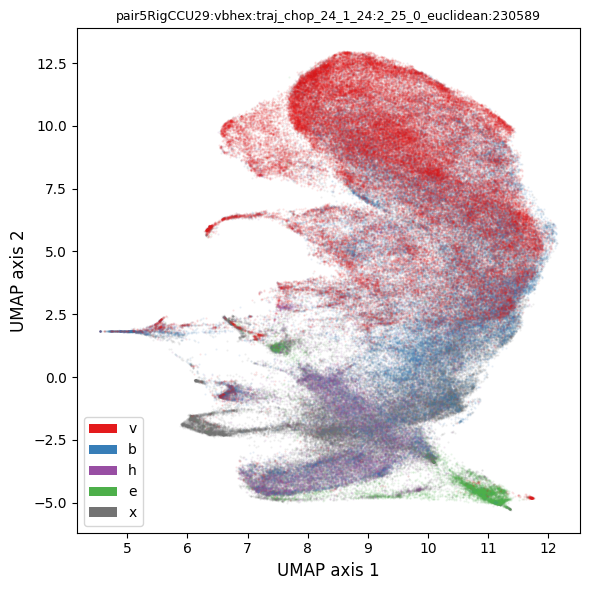

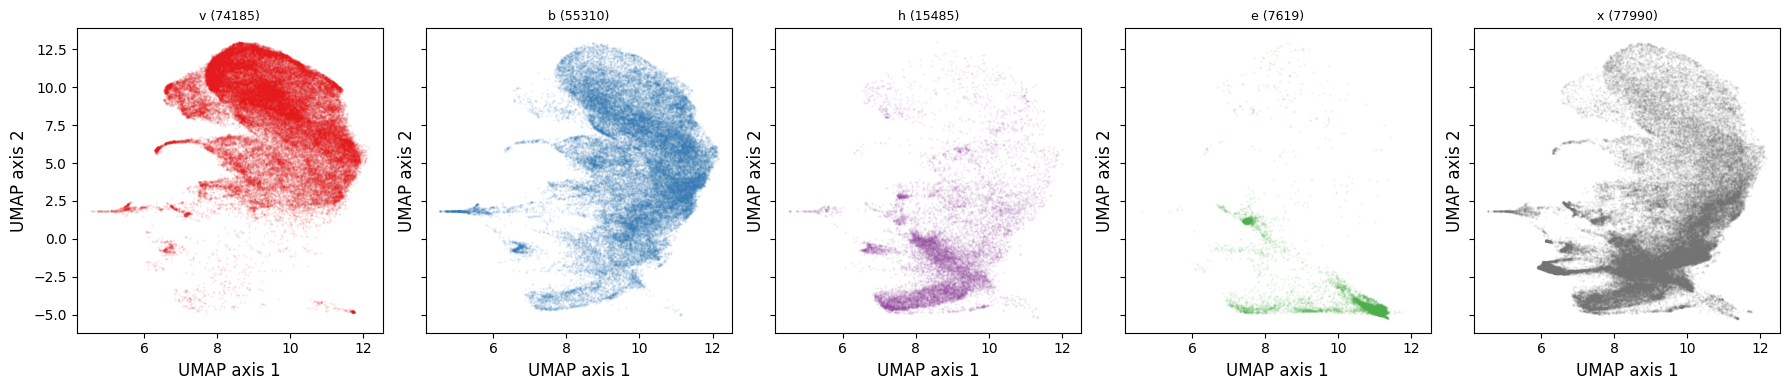

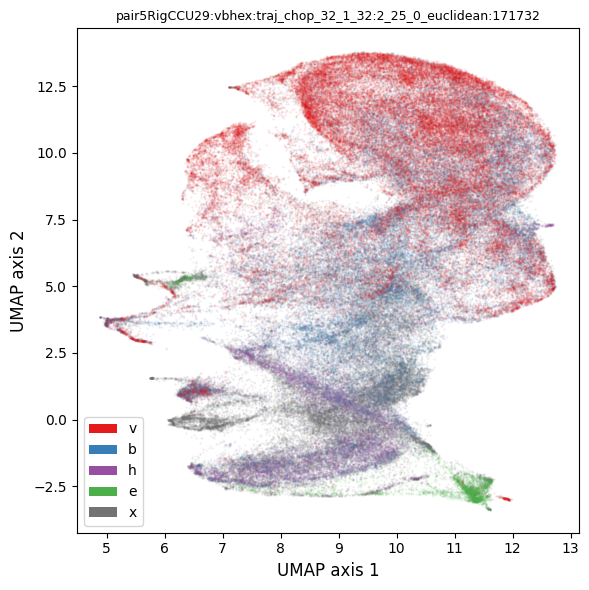

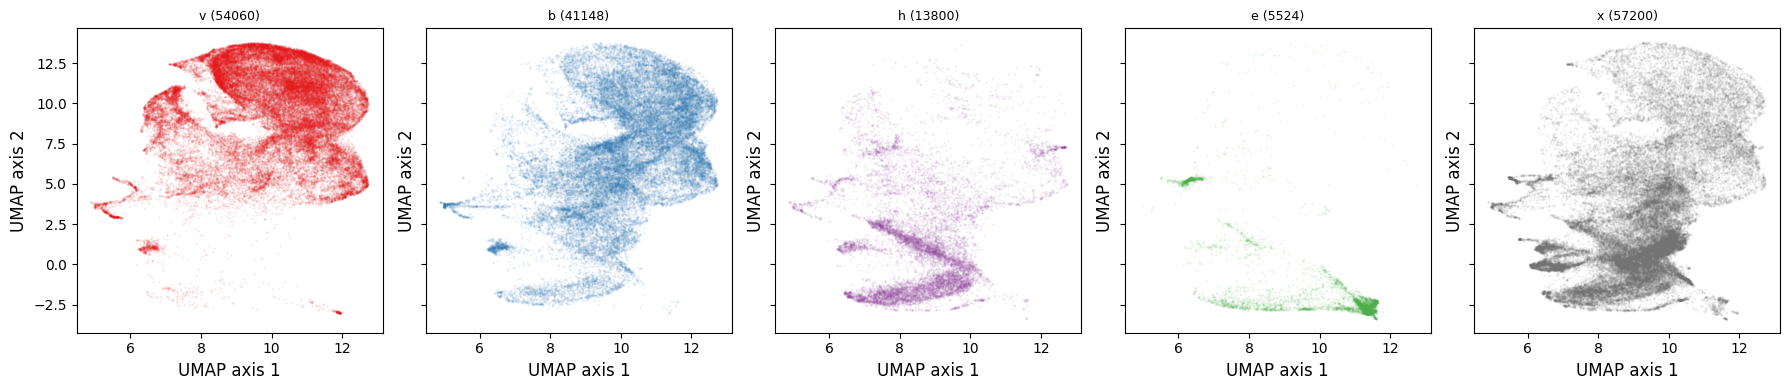

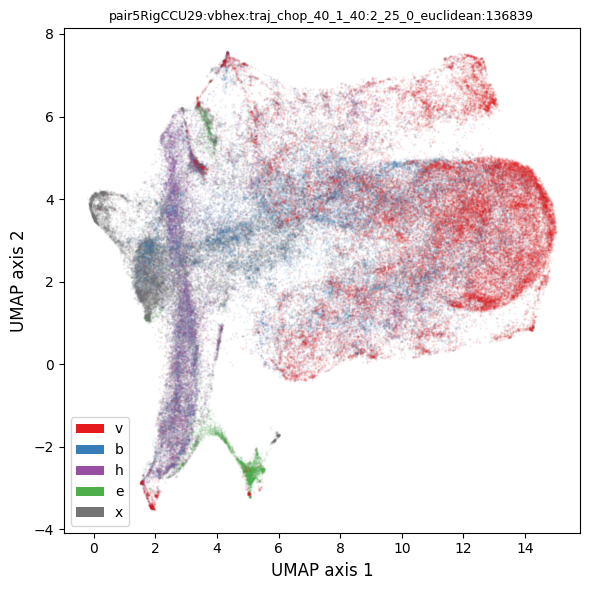

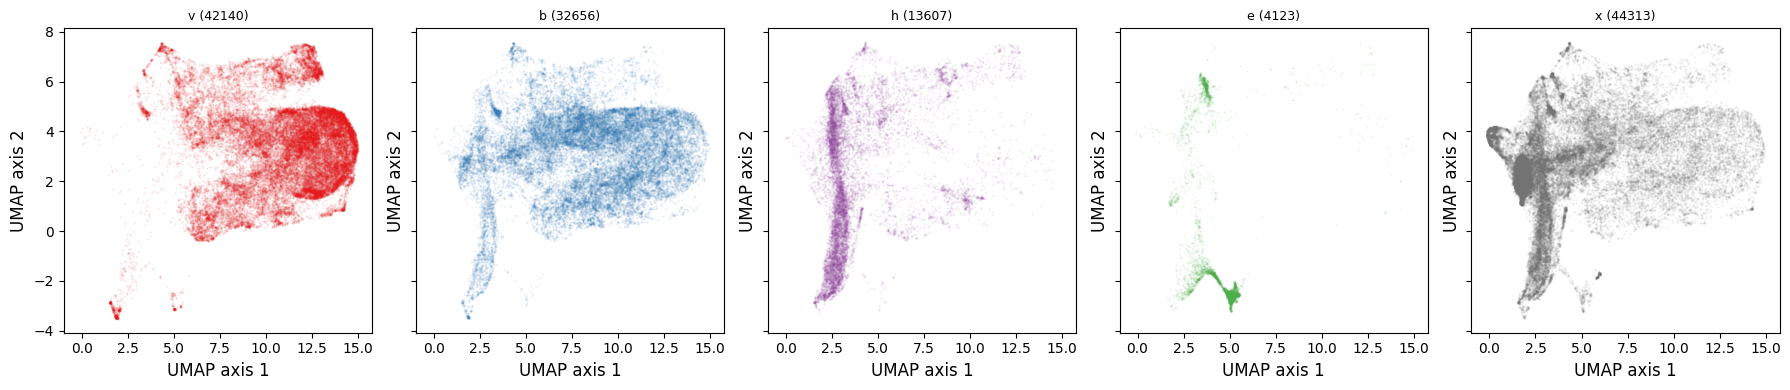

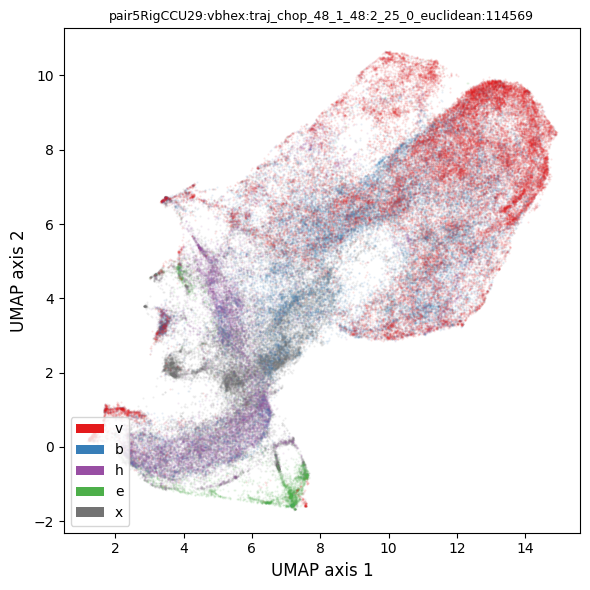

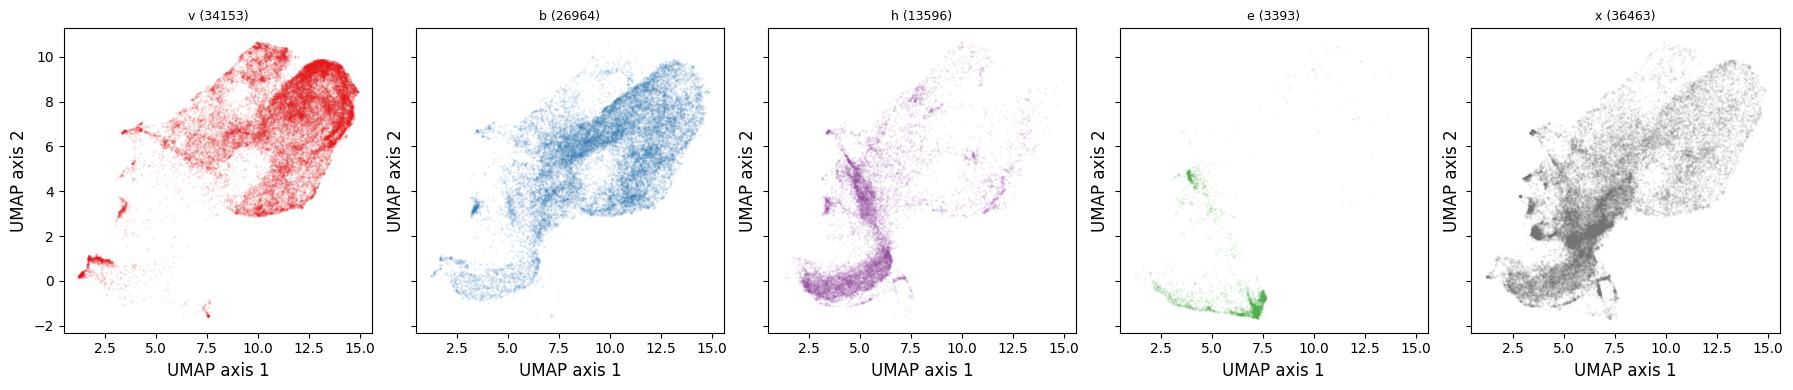

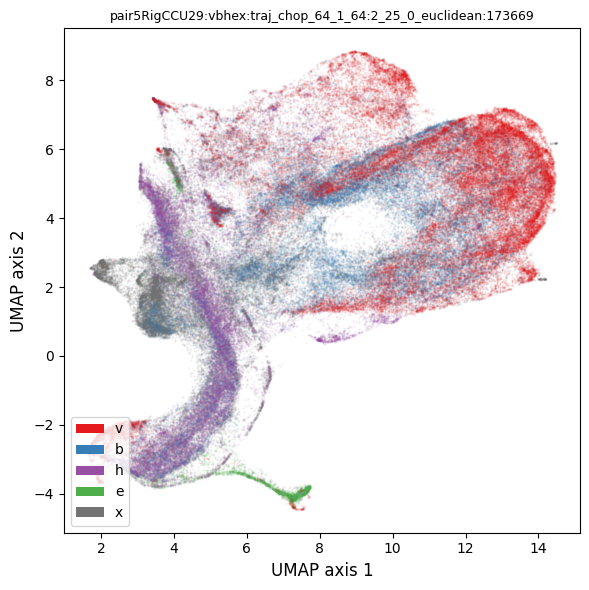

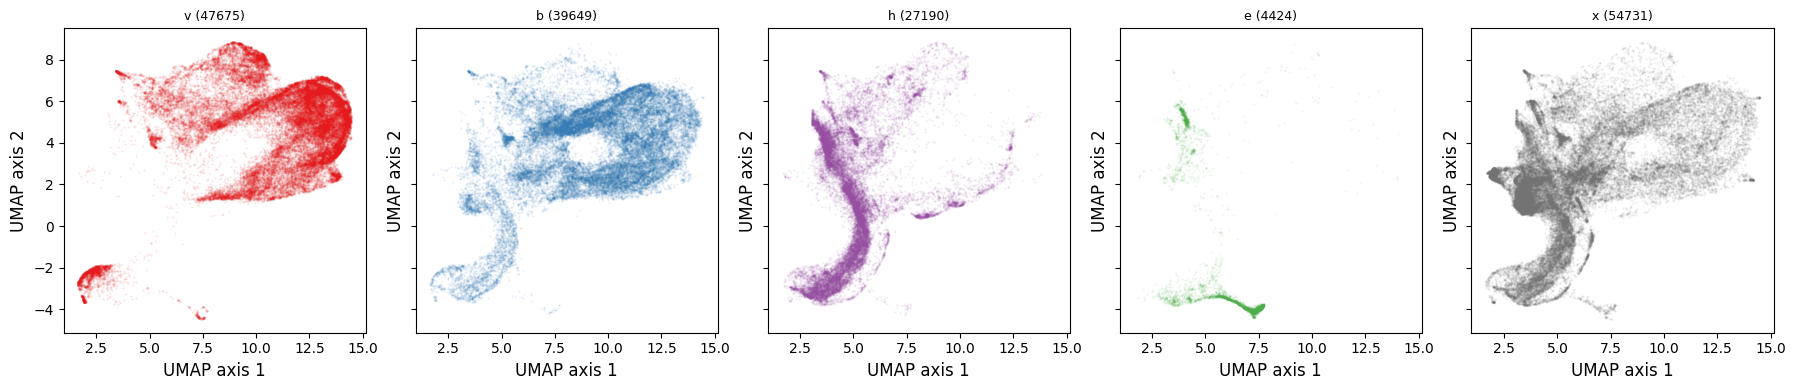

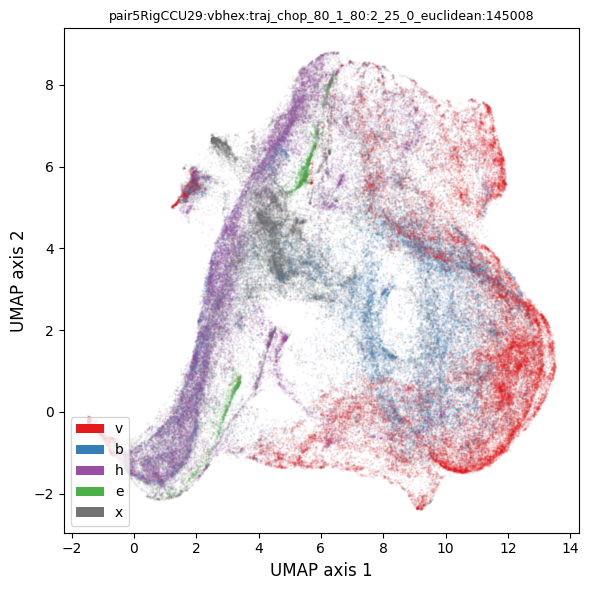

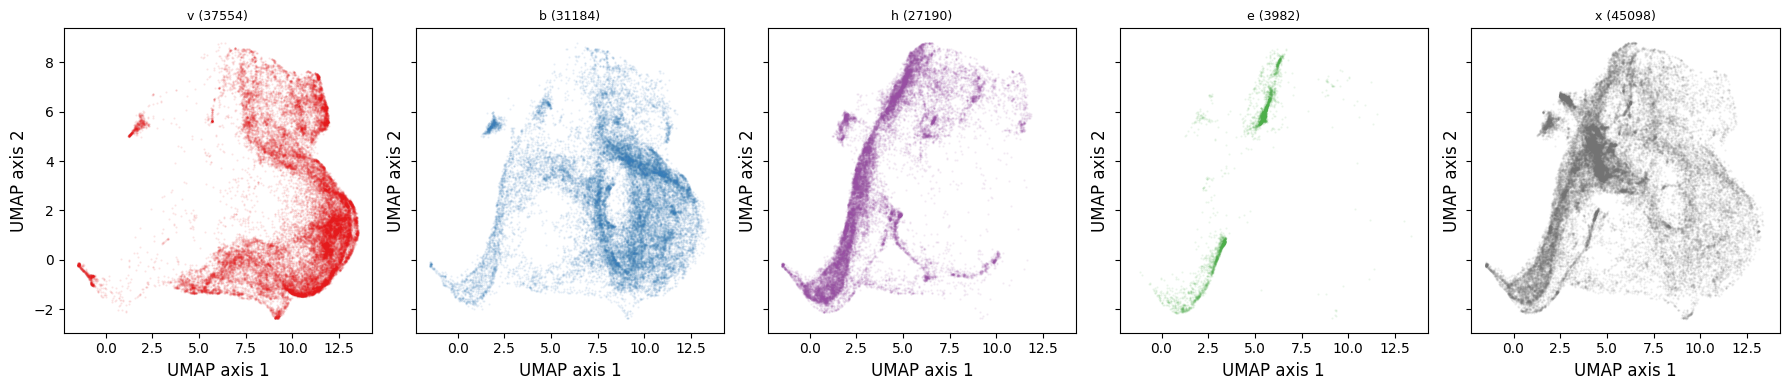

In [26]:
# wi = 0
for wi in range(1, len(win_list)):
    # save in subfolder
    w = win_list[wi]
    rn = f'{w}_1_{w}'
    fd_save = os.path.join(fd_data, bd, 'Traj', umap_suffix, rn)
    if not os.path.exists(fd_save):
        os.makedirs(fd_save)
    print(fd_save)

    # load the latent features
    vae_run = f'traj_chop_{rn}'
    fd_vae = os.path.join(fd_data, bd, 'Traj', vae_suffix, vae_run)
    fn_latent_m = os.path.join(fd_vae, 'latentM.csv')
    latent_m = np.loadtxt(fn_latent_m, delimiter=',')
    print(latent_m.shape)

    # also get the meta info about the sliding windows
    chop_run = f'traj_chop_{rn}'
    fd_chop = os.path.join(fd_data, bd, 'Traj', chop_suffix)
    fn_info = os.path.join(fd_chop, f'{bd}.{chop_run}.chop.info.csv')
    info = pd.read_csv(fn_info, index_col=0)
    print(info.shape)
    info.head()

    Counter(info['label'])

    umap_syl = ['v', 'b', 'h', 'e', 'x']
    # umap_syl = ['v']
    # umap_syl = ['v', 'b']
    # umap_syl = ['v', 'b', 'x']
    syl_str = ''.join(umap_syl)

    # select rows that belong to the syllable
    idx_syl = np.array(info[info['label'].isin(umap_syl)].index)
    info_this = info.iloc[idx_syl,:].copy()
    info_this.index = range(info_this.shape[0])
    latent_this = latent_m[idx_syl,:].copy()
    print(info_this.shape, latent_this.shape)

    # run UMAP
    # add latent_m to the embedding data frame
    embed = info_this.copy()
    for ii in range(latent_this.shape[1]):
        embed[f'vae{ii}'] = latent_this[:,ii]

    print(param_umap)
    umap_model = umap.UMAP(n_neighbors=param_umap['n_neighbors'], n_components=param_umap['n_components'], min_dist=param_umap['min_dist'], 
                                                  metric=param_umap['metric'], random_state=1118, verbose=True)
    res = umap_model.fit_transform(latent_this)

    # add UMAP embedding to the dataframe
    for jj in range(res.shape[1]):
        embed[f'umap{jj+1}'] = res[:,jj]

    # save the UMAP model for later usage
    fn_umap = os.path.join(fd_save, f'UMAPmodel_{bd}.{syl_str}.p')
    pickle.dump(umap_model, open(fn_umap, 'wb'))

    # save the embedding results
    fn_embed = os.path.join(fd_save, f'{bd}.{syl_str}.{vae_run}.embedding.csv')
    embed.to_csv(fn_embed)
    print(fn_embed)

    ## plot embedding
    col_list = ['#e41a1c', '#377eb8', '#984ea3', '#4daf4a', '#737373']
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6, 6])
    # for si, ss in enumerate(syl):
    # plot the X first
    for si in range(len(syl)-1, -1, -1):
        ss = syl[si]
        embed_s = embed[embed['label']==ss]
        ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.1, c=col_list[si], rasterized=True)
    # add legend
    legends = [Patch(facecolor=col, label=name) for col, name in zip(col_list, syl)]
    plt.legend(handles=legends, loc='lower left')
    ax.set_title(f'{bd}:{syl_str}:{chop_run}:{umap_run}:{embed.shape[0]}', fontsize=9)
    ax.set_xlabel('UMAP axis 1', fontsize=12)
    ax.set_ylabel('UMAP axis 2', fontsize=12)
    plt.tight_layout()
    # save fig
    fn_fig =os.path.join(fd_save, f'{bd}.{syl_str}.embedding.pdf')
    fig.savefig(fn_fig, dpi=600)

    # plot in seperate panels
    col_list = ['#e41a1c', '#377eb8', '#984ea3', '#4daf4a', '#737373']
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=[18, 4], sharex=True, sharey=True)
    # for si, ss in enumerate(syl):
    # plot the X first
    for si in range(len(syl)-1, -1, -1):
        ax = axes[si]
        ss = syl[si]
        embed_s = embed[embed['label']==ss]
        ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.1, c=col_list[si], rasterized=True)
        ax.set_title(f'{ss} ({embed_s.shape[0]})', fontsize=9)
        ax.set_xlabel('UMAP axis 1', fontsize=12)
        ax.set_ylabel('UMAP axis 2', fontsize=12)
    plt.tight_layout()
    # save fig
    fn_fig =os.path.join(fd_save, f'{bd}.{syl_str}.embeddingInd.pdf')
    fig.savefig(fn_fig, dpi=600)
    
    del latent_m, info, embed, res, umap_model
    gc.collect()